In [1]:
!pip install easyocr

In [2]:
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
annot=pd.read_parquet(r"C:\Users\91727\Downloads\archive\annot.parquet")
annot.head()

id          image_id                           bbox  \
0  a4ea732cd3d5948a_1  a4ea732cd3d5948a   [525.83, 3.4, 197.64, 33.94]   
1  a4ea732cd3d5948a_2  a4ea732cd3d5948a  [534.67, 64.68, 91.22, 38.19]   
2  a4ea732cd3d5948a_3  a4ea732cd3d5948a  [626.95, 63.62, 96.52, 31.82]   
3  a4ea732cd3d5948a_4  a4ea732cd3d5948a  [577.4, 141.87, 147.13, 43.1]   
4  a4ea732cd3d5948a_5  a4ea732cd3d5948a  [391.03, 163.9, 60.82, 38.65]   

   utf8_string                                             points     area  
0  Performance  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  6707.90  
1        Sport  [535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...  3483.69  
2        Watch  [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...  3071.27  
3   ...period.  [580.02, 143.61, 724.53, 141.87, 723.66, 184.9...  6341.30  
4            .  [395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...  2350.69

In [4]:
import pandas as pd
images=pd.read_parquet(r"C:\Users\91727\Downloads\archive\img.parquet")
image_file_names=glob(r"C:\Users\91727\Downloads\archive\train_val_images\train_images\*")
print(image_file_names)

['C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\0000599864fd15b3.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\0000e8b36676338b.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\00010bf498b64bab.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\00012db06b98f573.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\00016982f6086d39.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\0001a2f47097ee27.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\0001c6bf48e16ab2.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\000209d575f3aa4f.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\000228608388803f.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\train_images\\0002c799b0cd7412.jpg', 'C:\\Users\\91727\\Downloads\\archive\\train_val_images\\tr

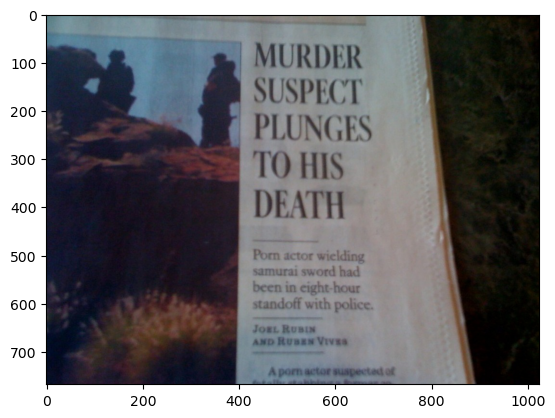

In [5]:
import os
os.chdir('C:\\Users\\91727\\Downloads\\archive\\train_val_images')
plt.imshow(plt.imread(image_file_names[56]))

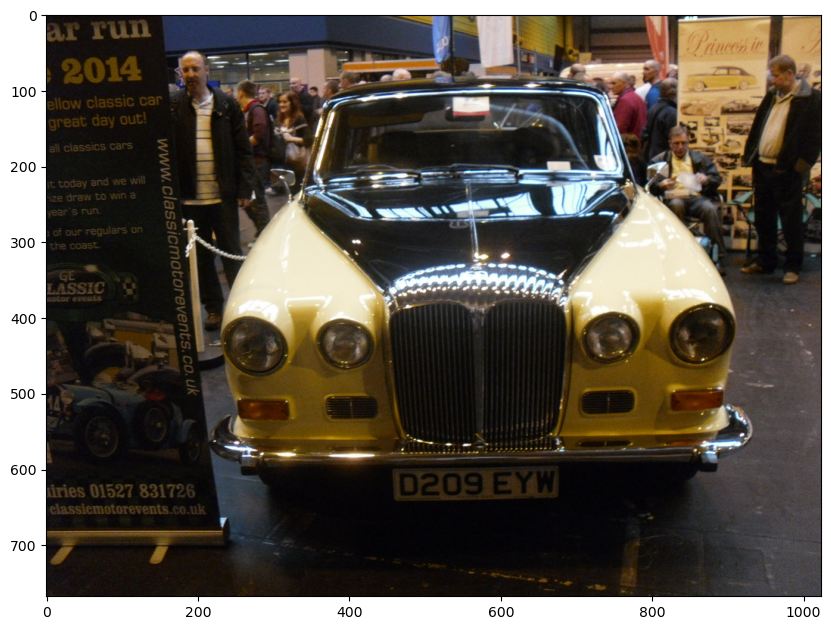

In [6]:
fig,ax= plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(image_file_names[76]))
plt.show()

In [7]:
image_id=image_file_names[0].split('\\')[-1].split(('.'))[0]
annot.query('id==@image_id')

Empty DataFrame
Columns: [id, image_id, bbox, utf8_string, points, area]
Index: []

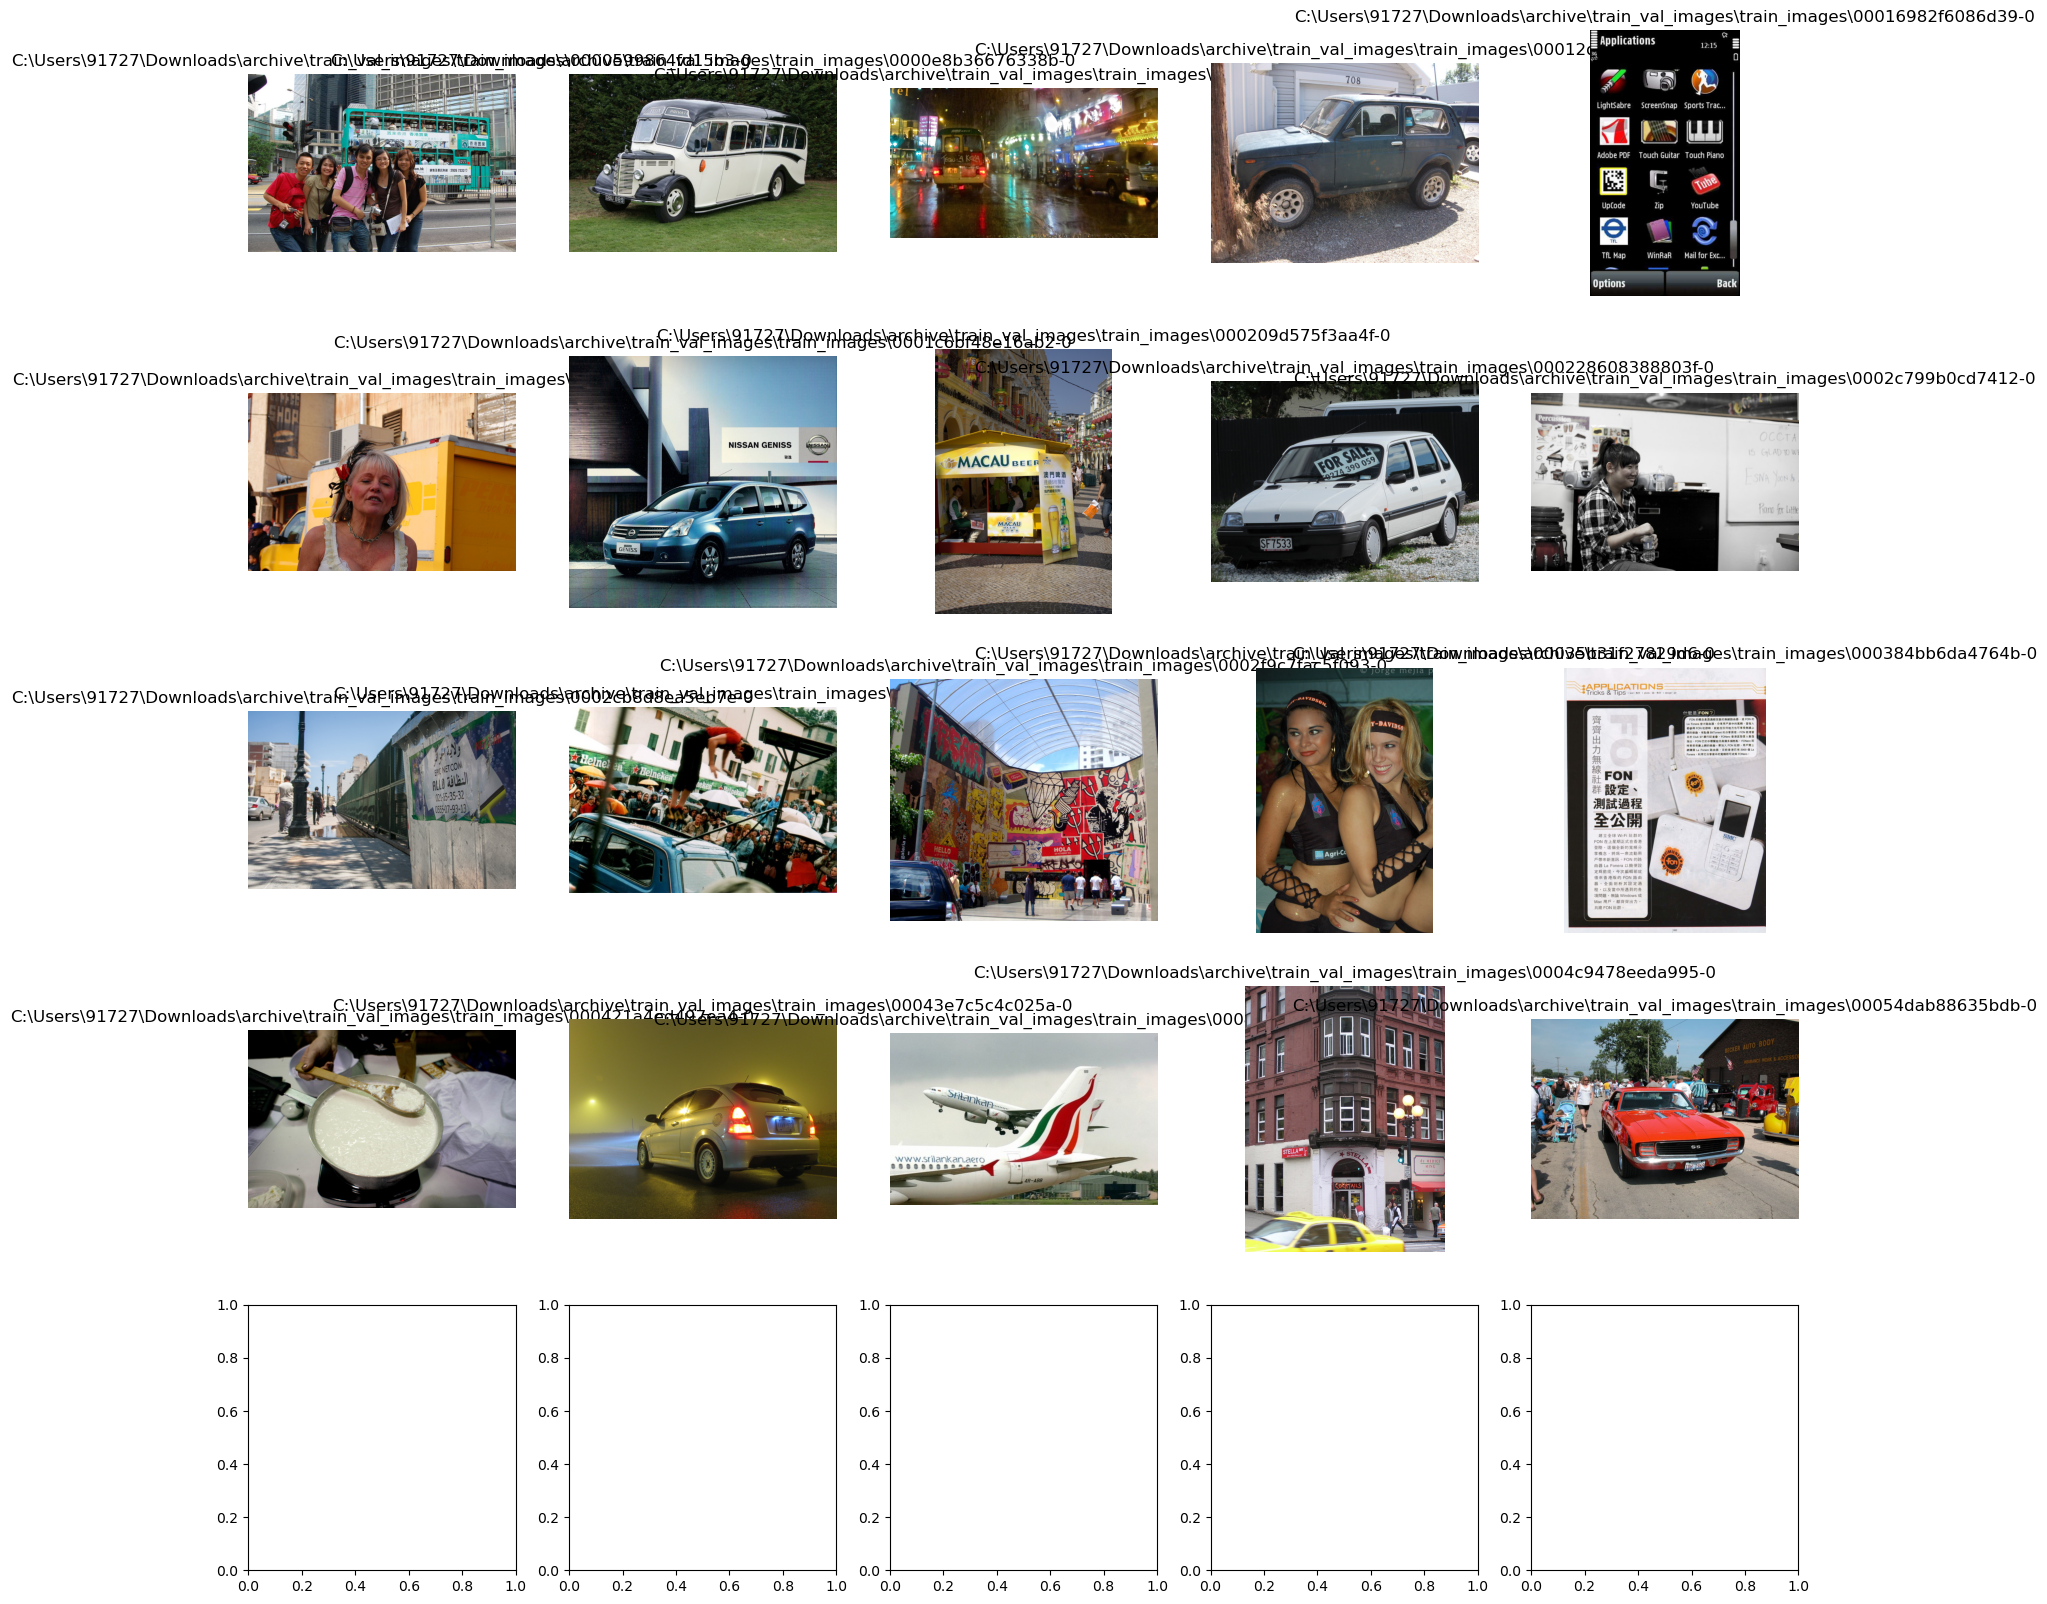

In [8]:
# Displaying first 20 images
fig, ax=plt.subplots(5,5,figsize=(20,20))
ax=ax.flatten()
for i in range(20):
    ax[i].imshow(plt.imread(image_file_names[i]))
    ax[i].axis('off')
    image_id=image_file_names[i].split('/')[-1].rstrip('.jpg')
    n_annot=len(annot.query('id==@image_id'))
    ax[i].set_title(f'{image_id}-{n_annot}')
plt.show()

In [9]:
import easyocr
reader= easyocr.Reader(['en'], gpu=True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
results=reader.readtext(image_file_names[25])
results

[([[270.00649859892917, 105.12534453582381],
   [355.92232270276367, 119.21553545944727],
   [348.99350140107083, 151.8746554641762],
   [263.07767729723633, 137.78446454055273]],
  'RADAR',
  0.9790830379062335),
 ([[247.27253004752583, 154.05320432317575],
   [419.9917630335159, 187.71311706703932],
   [409.72746995247417, 231.94679567682425],
   [236.0082369664841, 198.28688293296068]],
  'National',
  0.9884297500945542),
 ([[422.0593947347958, 183.07418682921323],
   [502.858720852682, 209.70563143952376],
   [485.9406052652042, 257.9258131707868],
   [405.141279147318, 231.29436856047624]],
  'Key',
  0.9999874049413062),
 ([[499.26190718873653, 201.05477816453487],
   [662.986829084794, 232.6373215211059],
   [652.7380928112634, 277.94522183546513],
   [488.01317091520605, 245.3626784788941]],
  'Scheme',
  0.9442421688986159),
 ([[413.228115598632, 232.0599398312445],
   [543.9541508402215, 259.3244339763334],
   [531.7718844013681, 305.9400601687555],
   [402.0458491597785, 27

In [11]:
#put the results in a dataframe
easyocr_df=pd.DataFrame(results,columns=['bbox','text','conf'])
easyocr_df

bbox        text      conf
0   [[270.00649859892917, 105.12534453582381], [35...       RADAR  0.979083
1   [[247.27253004752583, 154.05320432317575], [41...    National  0.988430
2   [[422.0593947347958, 183.07418682921323], [502...         Key  0.999987
3   [[499.26190718873653, 201.05477816453487], [66...      Scheme  0.944242
4   [[413.228115598632, 232.0599398312445], [543.9...       Guide  0.999257
5   [[238.36271106700687, 251.0684709082316], [356...  Accessible  0.996400
6   [[543.1504654174618, 258.0726994212783], [653....        2010  0.999999
7   [[352.2365201021611, 273.09877638821206], [428...    'toilets  0.643481
8   [[424.07899166023174, 286.14487414671834], [46...         for  0.999987
9   [[460.3351366892331, 294.0746014326256], [564....   disabled   0.631055
10  [[556.9820268028815, 316.1317018509494], [647....      people  0.999994
11  [[518.1675694221406, 837.0875762840607], [604....       E9.99  0.963562

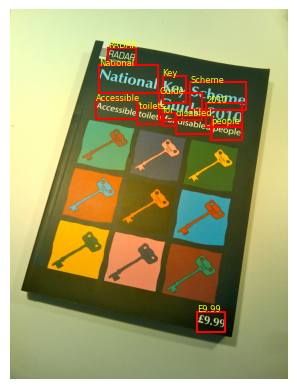

In [12]:
import matplotlib.pyplot as plt
from glob import glob

image_file_names=glob(r"C:\Users\91727\Downloads\archive\train_val_images\train_images\*")
results=reader.readtext(image_file_names[25])

# Plot the image with text annotations
image = plt.imread(image_file_names[25])
plt.imshow(image)

for detection in results:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    plt.text(top_left[0], top_left[1], text, fontsize=6, color='yellow')
    plt.plot([top_left[0], bottom_right[0], bottom_right[0], top_left[0], top_left[0]],
             [top_left[1], top_left[1], bottom_right[1], bottom_right[1], top_left[1]], color='red')
   
plt.axis('off')
plt.show()


In [13]:
pip install translate


Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt
from glob import glob
from translate import Translator

# Initialize the translator with the desired target language
translator = Translator(to_lang="zh")

# Replace this path with the actual path to your image files
image_file_names = glob(r"C:\Users\91727\Downloads\archive\train_val_images\train_images\*")
results = reader.readtext(image_file_names[25])

# Print the translated text alongside the original text
for detection in results:
    text = detection[1]
    
    # Translate the detected text
    translation = translator.translate(text)
    
    # Display the original and translated text
    print(f"Original Text: {text}")
    print(f"Translated Text: {translation}\n")



Original Text: RADAR
Translated Text: 雷达

Original Text: National
Translated Text: 国家

Original Text: Key
Translated Text: 密钥

Original Text: Scheme
Translated Text: 计划 

Original Text: Guide
Translated Text: 指南

Original Text: Accessible
Translated Text: 可获得

Original Text: 2010
Translated Text: 2010

Original Text: 'toilets
Translated Text: 洗手间

Original Text: for
Translated Text: 为了

Original Text: disabled 
Translated Text: 禁用

Original Text: people
Translated Text: 人员

Original Text: E9.99
Translated Text: E 9.99

